# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from numpy.random import RandomState
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn import metrics
from time import time

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

Using TensorFlow backend.
/home/luis/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luis/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luis/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luis/anaconda3/lib/python3.7/site-packages/tensorflow/py

In [2]:
data=np.load("data/olivetti_faces.npy")
target=np.load("data/olivetti_faces_target.npy")

In [3]:
print(data.shape)
print(target)

(400, 64, 64)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 

In [4]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [5]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

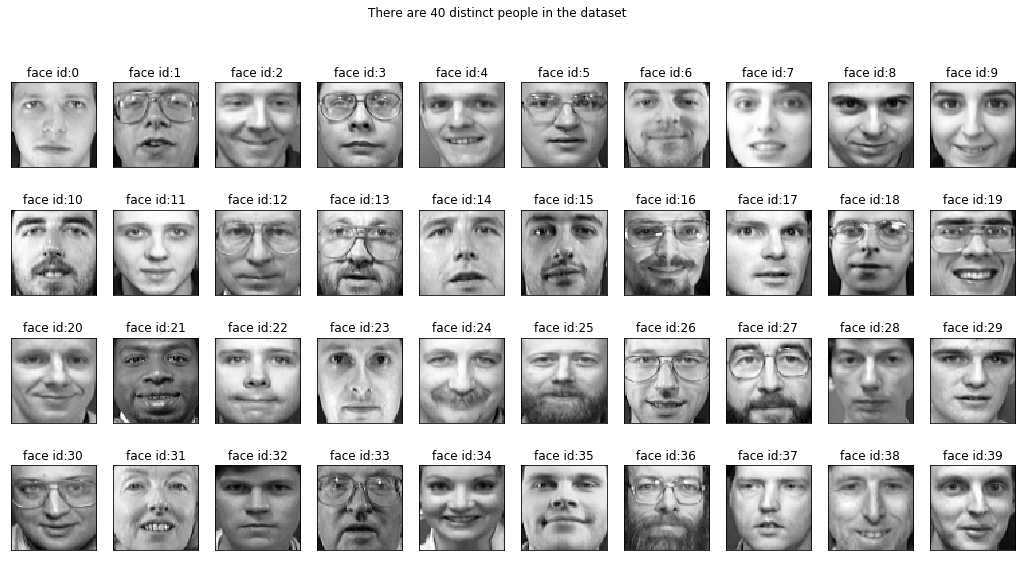

In [6]:
show_40_distinct_people(data, np.unique(target))

In [7]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

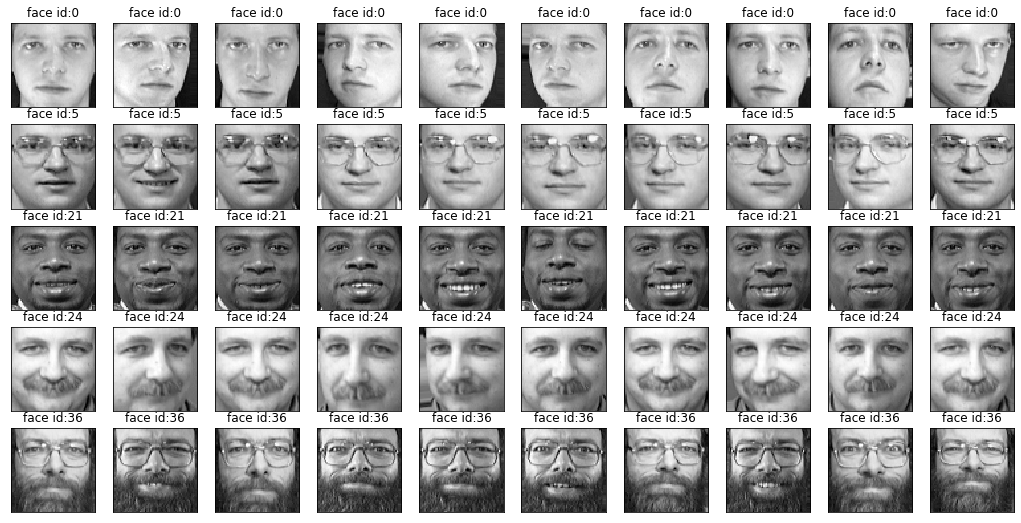

In [8]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

### IMPORTANTE
> Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail(glasses, beard)

In [9]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("target shape:",target.shape)
y=target.reshape((target.shape[0],1))
print("X shape:",X.shape)
print("y shape:",y.shape)

target shape: (400,)
X shape: (400, 4096)
y shape: (400, 1)


In [10]:
'''
The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 
30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. 
Thus, there will be 7 training images and 3 test images for each subject. You can play with training and test rates.
'''
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape: (280, 4096)
y_train shape:(280, 1)
y_test shape:(120, 1)


In [11]:

print(np.unique(y_train))
print()
#for id in np.unique(y_train):
#    print("--------------------", id)
#    print(y_train == id)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]



{0: 7, 1: 7, 2: 7, 3: 7, 4: 7, 5: 7, 6: 7, 7: 7, 8: 7, 9: 7, 10: 7, 11: 7, 12: 7, 13: 7, 14: 7, 15: 7, 16: 7, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 7, 23: 7, 24: 7, 25: 7, 26: 7, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 7, 33: 7, 34: 7, 35: 7, 36: 7, 37: 7, 38: 7, 39: 7}


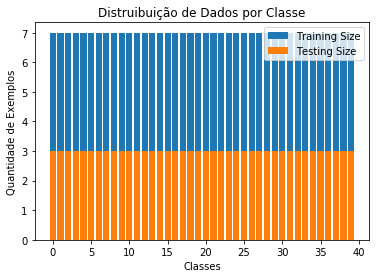

In [12]:
train_distribuition = dict(zip(*np.unique(y_train, return_counts=True)))
test_distribuition = dict(zip(*np.unique(y_test, return_counts=True)))
print(train_distribuition)
plt.bar(train_distribuition.keys(), train_distribuition.values())
plt.bar(test_distribuition.keys(), test_distribuition.values())

plt.legend(["Training Size", "Testing Size"])
plt.xlabel("Classes")
plt.ylabel("Quantidade de Exemplos")
plt.title("Distruibuição de Dados por Classe")
plt.show()

In [13]:
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)
print(X_pca.shape)

(400, 2)


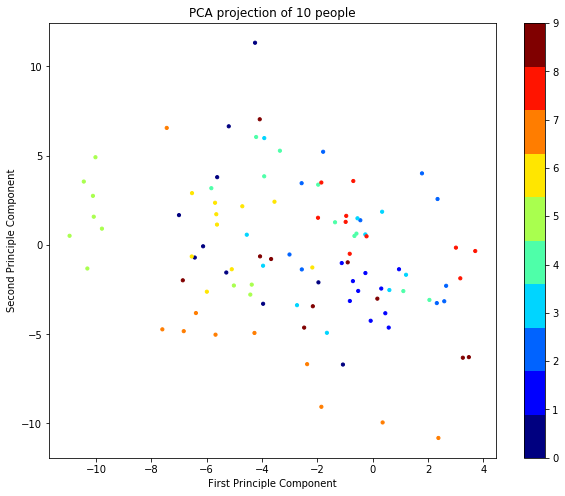

In [14]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

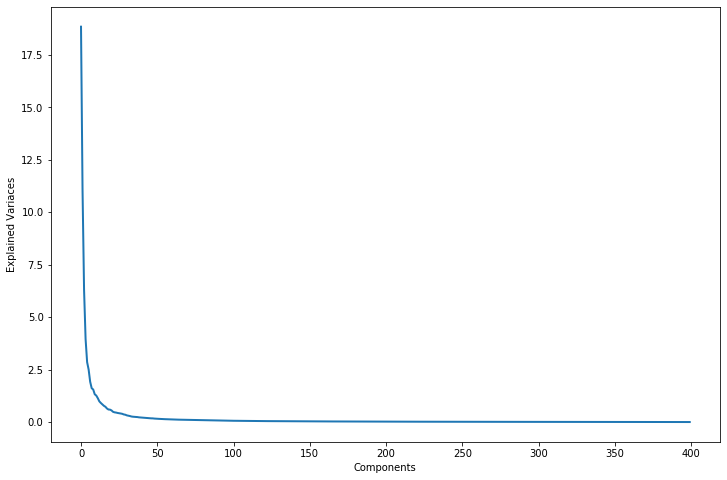

In [15]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

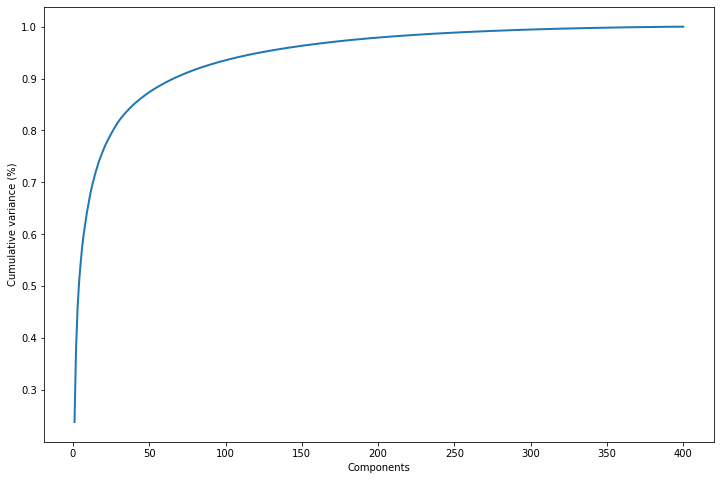

In [16]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(np.arange(1, 401, step=1),np.cumsum(pca.explained_variance_ratio_), linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Cumulative variance (%)')
plt.show()

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)
PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)


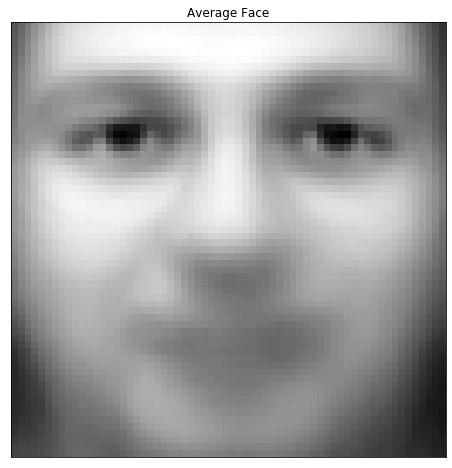

In [55]:
import time
for n_components in [90]:
    pca=PCA(n_components=n_components, whiten=True)
    pca.fit(X_train)
    print(pca)
    fig,ax=plt.subplots(1,1,figsize=(8,8))
    ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Average Face')
print(pca)

In [58]:
print((pca.components_.shape))
print(len(pca.components_[0]))

(90, 4096)
4096


Text(0.5, 0.98, 'All Eigen Faces')

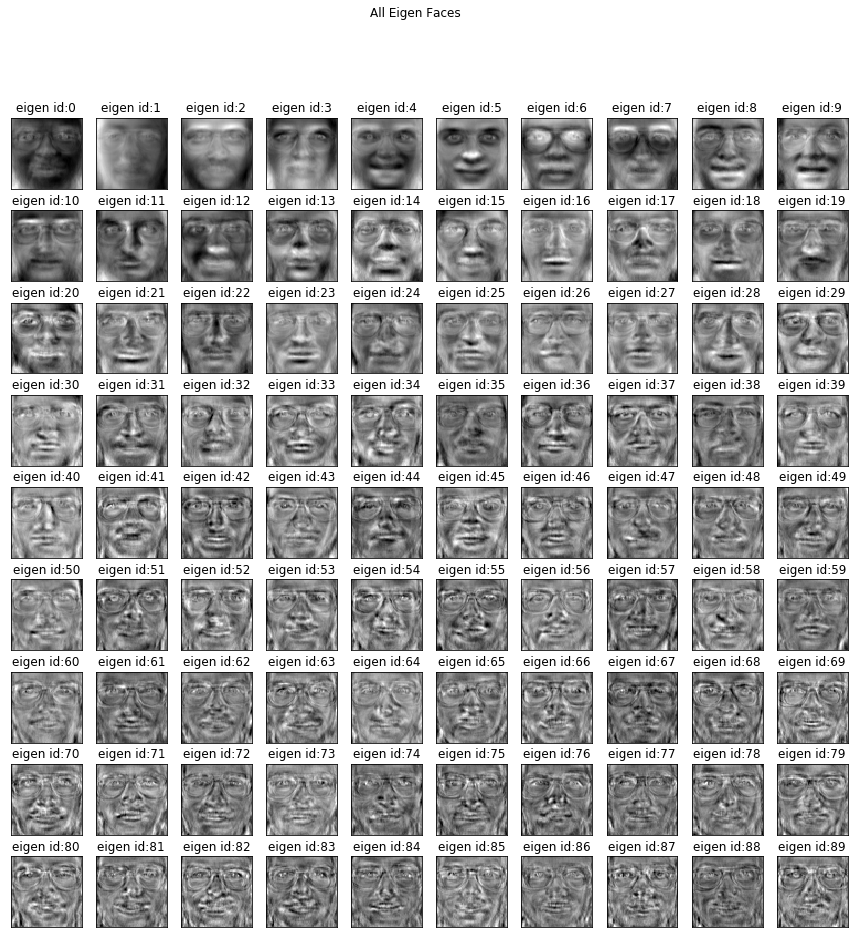

In [51]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

## With PCA

In [52]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train.shape)
print(X_train_pca.shape)

clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

(280, 4096)
(280, 90)
accuracy score:0.92


/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## WithOut PCA

In [35]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score:0.82


### ACHO QUE TEM OVERFIT..

In [22]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_train_pca)
print(metrics.accuracy_score(y_train, y_pred))

1.0


/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
print(X_train_pca.shape)
print(X_train_pca[0].shape)


(280, 90)
(90,)


In [54]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93
accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.93
accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.87
accuracy score:0.87

========== KNN RESULT ==========
Accuracy score:0.72
accuracy score:0.72

========== DT RESULT ==========
Accuracy score:0.67
accuracy score:0.67

========== SVM RESULT ==========
Accuracy score:0.92
accuracy score:0.92



/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)

In [38]:
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
neighbors = [1, 2, 3, 4, 5, 6]

if True:
    for n in neighbors:
        clf=KNeighborsClassifier(n_neighbors=n)

        clf.fit(X_train_pca, y_train)

        y_pred=clf.predict(X_test_pca)
        print(10*"=","{} Result".format(n),10*"=")
        print("Accuracy score:{}".format(metrics.accuracy_score(y_test, y_pred)))
        print("Another Score: ", clf.score(X_test_pca, y_test))
        print()

========== 1 Result ==========
Accuracy score:0.85
Another Score:  0.85

========== 2 Result ==========
Accuracy score:0.7916666666666666
Another Score:  0.7916666666666666

========== 3 Result ==========
Accuracy score:0.775
Another Score:  0.775

========== 4 Result ==========
Accuracy score:0.7416666666666667
Another Score:  0.7416666666666667

========== 5 Result ==========
Accuracy score:0.7
Another Score:  0.7

========== 6 Result ==========
Accuracy score:0.7
Another Score:  0.7



/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

In [25]:
## saquei da net mas nem sei por a dar...
model = Sequential()

model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(40, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              